In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5037

Best Fitness:	600.3180
Solution:	600.0000
Diff:		0.3180

[0:07:52][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5920

Best Fitness:	600.2688
Solution:	600.0000
Diff:		0.2688

[0:15:16][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5008

Best Fitness:	600.3503
Solution:	600.0000
Diff:		0.3503

[0:22:21][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3677

Best Fitness:	600.2551
Solution:	600.0000
Diff:		0.2551

[0:29:52][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6155

Best Fitness:	600.3641
Solution:	600.0000
Diff:		0.3641

[0:37:18][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5377

Best Fitness:	600.3431
Solution:	600.0000
Diff:		0.3431

[0:43:49][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.7214

Best Fitness:	600.4254
Solution:	600.0000
Diff:		0.4254

[0:50:04][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4808

Best Fitness:	600.3046
Solution:	600.0000
Diff:		0.3046

[0:56:16][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3560

Best Fitness:	600.2363
Solution:	600.0000
Diff:		0.2363

[1:02:32][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4871

Best Fitness:	600.3125
Solution:	600.0000
Diff:		0.3125

[1:08:42][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3802

Best Fitness:	600.2366
Solution:	600.0000
Diff:		0.2366

[1:14:49][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6949

Best Fitness:	600.4257
Solution:	600.0000
Diff:		0.4257

[1:21:09][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.7397

Best Fitness:	600.4769
Solution:	600.0000
Diff:		0.4769

[1:27:14][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5844

Best Fitness:	600.3956
Solution:	600.0000
Diff:		0.3956

[1:33:07][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4672

Best Fitness:	600.2918
Solution:	600.0000
Diff:		0.2918

[1:38:35][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4642

Best Fitness:	600.2853
Solution:	600.0000
Diff:		0.2853

[1:43:46][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5698

Best Fitness:	600.3818
Solution:	600.0000
Diff:		0.3818

[1:49:13][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4135

Best Fitness:	600.2679
Solution:	600.0000
Diff:		0.2679

[1:54:38][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	602.5087

Best Fitness:	601.9050
Solution:	600.0000
Diff:		1.9050

[2:00:00][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3549

Best Fitness:	600.1928
Solution:	600.0000
Diff:		0.1928

[2:05:18][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.2724

Best Fitness:	600.1334
Solution:	600.0000
Diff:		0.1334

[2:10:40][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6094

Best Fitness:	600.4022
Solution:	600.0000
Diff:		0.4022

[2:16:00][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.9521

Best Fitness:	600.6488
Solution:	600.0000
Diff:		0.6488

[2:21:18][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.9146

Best Fitness:	600.6599
Solution:	600.0000
Diff:		0.6599

[2:25:54][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.8755

Best Fitness:	600.6040
Solution:	600.0000
Diff:		0.6040

[2:30:29][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5225

Best Fitness:	600.3379
Solution:	600.0000
Diff:		0.3379

[2:35:06][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.7302

Best Fitness:	600.4436
Solution:	600.0000
Diff:		0.4436

[2:39:44][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.7639

Best Fitness:	600.5019
Solution:	600.0000
Diff:		0.5019

[2:44:28][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3998

Best Fitness:	600.2496
Solution:	600.0000
Diff:		0.2496

[2:48:57][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3492

Best Fitness:	600.2024
Solution:	600.0000
Diff:		0.2024

[2:53:31][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3090

Best Fitness:	600.2116
Solution:	600.0000
Diff:		0.2116

[2:58:01][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.9351

Best Fitness:	600.5895
Solution:	600.0000
Diff:		0.5895

[3:02:37][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3496

Best Fitness:	600.2364
Solution:	600.0000
Diff:		0.2364

[3:07:10][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.8432

Best Fitness:	600.5160
Solution:	600.0000
Diff:		0.5160

[3:11:05][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.3809

Best Fitness:	600.2538
Solution:	600.0000
Diff:		0.2538

[3:15:08][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4219

Best Fitness:	600.2566
Solution:	600.0000
Diff:		0.2566

[3:19:05][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5033

Best Fitness:	600.3071
Solution:	600.0000
Diff:		0.3071

[3:23:06][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	602.7774

Best Fitness:	601.9680
Solution:	600.0000
Diff:		1.9680

[3:26:55][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5540

Best Fitness:	600.2440
Solution:	600.0000
Diff:		0.2440

[3:30:55][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	601.0013

Best Fitness:	600.6302
Solution:	600.0000
Diff:		0.6302

[3:34:56][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5505

Best Fitness:	600.3442
Solution:	600.0000
Diff:		0.3442

[3:38:56][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.4021

Best Fitness:	600.2355
Solution:	600.0000
Diff:		0.2355

[3:42:38][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.7269

Best Fitness:	600.4734
Solution:	600.0000
Diff:		0.4734

[3:46:00][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6298

Best Fitness:	600.4263
Solution:	600.0000
Diff:		0.4263

[3:49:18][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	602.3794

Best Fitness:	601.9456
Solution:	600.0000
Diff:		1.9456

[3:52:31][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5194

Best Fitness:	600.3388
Solution:	600.0000
Diff:		0.3388

[3:55:48][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	602.3772

Best Fitness:	601.9124
Solution:	600.0000
Diff:		1.9124

[3:59:07][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.5681

Best Fitness:	600.3604
Solution:	600.0000
Diff:		0.3604

[4:02:23][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	601.1079

Best Fitness:	600.6629
Solution:	600.0000
Diff:		0.6629

[4:05:40][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6068

Best Fitness:	600.3513
Solution:	600.0000
Diff:		0.3513

[4:08:57][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	600.6235

Best Fitness:	600.4266
Solution:	600.0000
Diff:		0.4266

[4:12:11][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:12:11

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,0.807415,0.879435,0.655399,0.673304,0.686188,0.716151,0.653125,0.623113,0.576347,0.615699,...,0.583994,0.698895,0.834866,0.807160,0.729167,0.685441,0.614824,0.806930,0.835941,50
194,0.807415,0.879435,0.655399,0.673304,0.686188,0.716151,0.653125,0.623113,0.576347,0.615699,...,0.583994,0.698895,0.834866,0.685299,0.729167,0.685441,0.614824,0.791777,0.835941,50
195,0.665092,0.798189,0.655399,0.673304,0.686188,0.678413,0.653125,0.623113,0.576347,0.615699,...,0.583994,0.698895,0.608284,0.524295,0.595393,0.685441,0.614824,0.763108,0.835941,50
196,0.665092,0.798189,0.655399,0.653853,0.686188,0.678413,0.653125,0.623113,0.576347,0.615699,...,0.583994,0.632474,0.608284,0.524295,0.595393,0.560781,0.614824,0.763108,0.627017,50
197,0.665092,0.587855,0.655399,0.588425,0.686188,0.678413,0.612695,0.601861,0.576347,0.615699,...,0.583994,0.632474,0.608284,0.524295,0.595393,0.560781,0.614824,0.763108,0.627017,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.31796364918875497

Best error for run 1: 0.2687600742806353

Best error for run 2: 0.35027586800867994

Best error for run 3: 0.25509725659901505

Best error for run 4: 0.3641265721274749

Best error for run 5: 0.3431117987684047

Best error for run 6: 0.4253674651434949

Best error for run 7: 0.3045551504392279

Best error for run 8: 0.23634129643119195

Best error for run 9: 0.31250013655028397

Best error for run 10: 0.23659602607472152

Best error for run 11: 0.42572226436504934

Best error for run 12: 0.4768877989703242

Best error for run 13: 0.3955818349106721

Best error for run 14: 0.29182290022936286

Best error for run 15: 0.28534986271381513

Best error for run 16: 0.3818282641531141

Best error for run 17: 0.267890718371973

Best error for run 18: 1.9049942640547215

Best error for run 19: 0.19278799573658034

Best error for run 20: 0.1333924747070796

Best error for run 21: 0.40224634504488677

Best error for run 22: 0.648755488801271

Best error for run 23: 0.6599127386587043

Best error for run 24: 0.6039744148495174

Best error for run 25: 0.3378869398935649

Best error for run 26: 0.4435920384825067

Best error for run 27: 0.5019203428174706

Best error for run 28: 0.24958458278251783

Best error for run 29: 0.20242831401094463

Best error for run 30: 0.21158304841117115

Best error for run 31: 0.5894817406081074

Best error for run 32: 0.23643811937040482

Best error for run 33: 0.5159582230897968

Best error for run 34: 0.2538106115903247

Best error for run 35: 0.25663531448537924

Best error for run 36: 0.3071024290817377

Best error for run 37: 1.9680346422095454

Best error for run 38: 0.24397125111670448

Best error for run 39: 0.6302107063131643

Best error for run 40: 0.34415361183573623

Best error for run 41: 0.2354682873311731

Best error for run 42: 0.47344845736301977

Best error for run 43: 0.42634958473013285

Best error for run 44: 1.9456384576814116

Best error for run 45: 0.3387719951257395

Best error for run 46: 1.9123836904368545

Best error for run 47: 0.3604320749192311

Best error for run 48: 0.6629186503311075

Best error for run 49: 0.35132519149021846

Best error for run 50: 0.42660338046539437

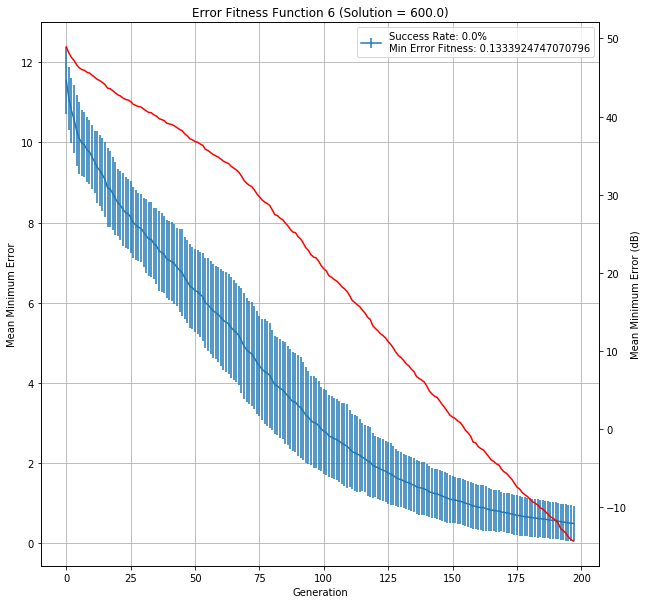

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.6,0.317964,0.26876,0.350276,0.255097,0.364127,0.343112,...,1.945638,0.338772,1.912384,0.360432,0.662919,0.351325,0.426603,0.48847,4:12:11,60000
